In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [33]:
df_bc = pd.read_csv('Breast_cancer_data.csv')
df_bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [36]:
df_bc.drop(['id', 'Unnamed: 32'], axis =1 , inplace=True) # 32 is an error

In [37]:
df_bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
df = df_bc
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [39]:
df.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [40]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [42]:
LE = LabelEncoder()
y = LE.fit_transform(df.iloc[:,0])

In [43]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [47]:
SS = StandardScaler()
x = SS.fit_transform(df.iloc[:,1:31])

In [48]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Training Test Data

In [49]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test , y_train, y_test = tts(x,y, test_size=0.2, random_state=0)

### Importing Models Library

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

# Importing metrics

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as con

### Assigning models

In [51]:
log = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=15)
svc = SVC(random_state=0, probability=True)
tree = DecisionTreeClassifier(random_state=0)
forest = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
bag = BaggingClassifier(DecisionTreeClassifier(random_state=0), random_state=0, n_estimators=100, n_jobs=-1)
grad = GradientBoostingClassifier(random_state=0, n_estimators=100, learning_rate=0.5)
ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), n_estimators=100, learning_rate=0.5, random_state=0)
vote_hard = VotingClassifier(estimators=[('l',log), ('k',knn), ('s',svc)], voting='hard')
vote_soft = VotingClassifier(estimators=[('l',log), ('k',knn), ('s',svc)], voting='soft')

In [54]:
z = np.empty(10)
l = 0
for i in (log,knn, svc,tree, forest, bag, grad, ada, vote_soft, vote_hard):
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    
    z[l] = acc(y_test, y_pred)
    l = l+1

/Users/karandeepsinghnanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/karandeepsinghnanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the

In [53]:
z

array([0.96491228, 0.95614035, 0.97368421, 0.9122807 , 0.96491228,
       0.97368421, 0.96491228, 0.90350877, 0.96491228, 0.96491228])

<Axes: >

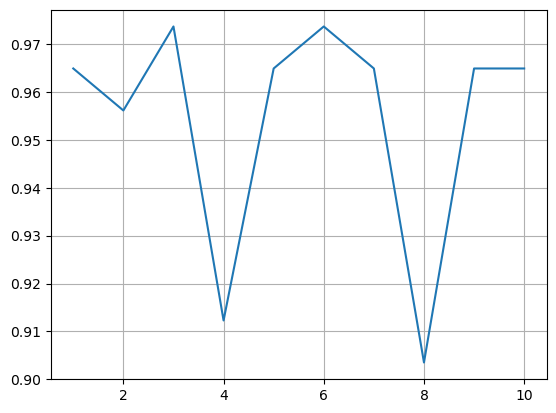

In [55]:
pd.Series (z, index = np.arange(1,11)). plot(grid = True)

In [58]:
Z = np.empty(16)
l = 0
for i in np.arange(300,620,20):
    bag = BaggingClassifier(DecisionTreeClassifier(random_state=0),random_state=0, n_estimators=i, n_jobs=-1)
    bag.fit(x_train,y_train)
    y_pred = bag.predict(x_test)
    
    Z[l] = acc(y_test,y_pred)
    l = l+1

Text(0, 0.5, 'Accuracy score')

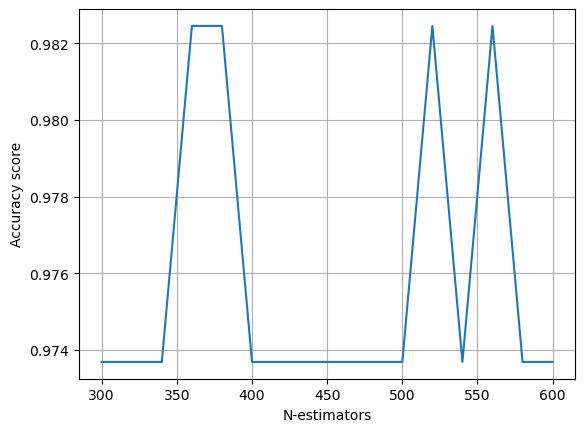

In [116]:
pd.Series(Z, index = np.arange(300,620,20)).plot(grid=True)
plt.xlabel('N-estimators')
plt.ylabel('Accuracy score')

#### Max accuracy reached at n-estimators = 360

In [63]:
bag = BaggingClassifier(DecisionTreeClassifier(random_state=0),random_state=0, n_estimators=360, n_jobs=-1)
bag.fit(x_train,y_train)
y_pred = bag.predict(x_test)
acc(y_test, y_pred)

0.9824561403508771

In [64]:
con(y_test,y_pred)

array([[66,  1],
       [ 1, 46]])

## Forest Parameter Training

In [65]:
N = np.empty(30)
l = 0
for i in np.arange(20,620,20):
    forest = RandomForestClassifier(random_state=0, n_estimators=i, n_jobs=-1)
    forest.fit(x_train,y_train)
    y_pred = forest.predict(x_test)
    
    N[l] = acc(y_test, y_pred)
    l = l+1

Text(0, 0.5, 'Accuracy score')

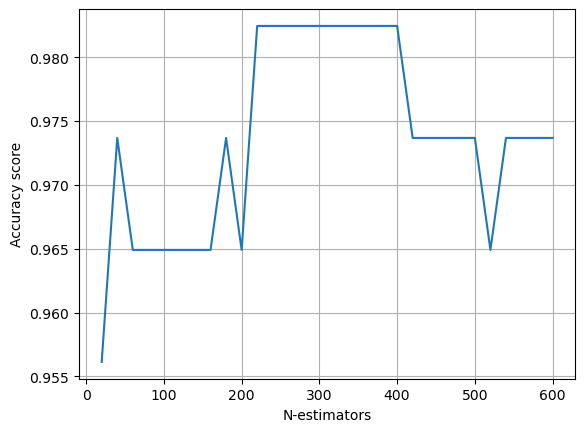

In [117]:
pd.Series(N, index = np.arange(20,620,20)).plot(grid=True)
plt.xlabel('N-estimators')
plt.ylabel('Accuracy score')

#### Max accuracy reached when n_estimators are 210 - 400

In [67]:
forest = RandomForestClassifier(random_state=0, n_estimators=220, n_jobs=-1)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

acc(y_test, y_pred)

0.9824561403508771

In [69]:
con(y_test, y_pred)

array([[66,  1],
       [ 1, 46]])

## Gradient Parameter Tuning

In [70]:
M = np.empty(210)
l =0
for i in np.arange(20,620,20):
    for j in np.arange(0.1,0.8,0.1):
        grad = GradientBoostingClassifier(random_state=0, n_estimators=i, learning_rate=j)
        grad.fit(x_train,y_train)
        y_pred = grad.predict(x_test)
        
        M[l] = acc(y_test, y_pred)
        l = l+1

<Axes: >

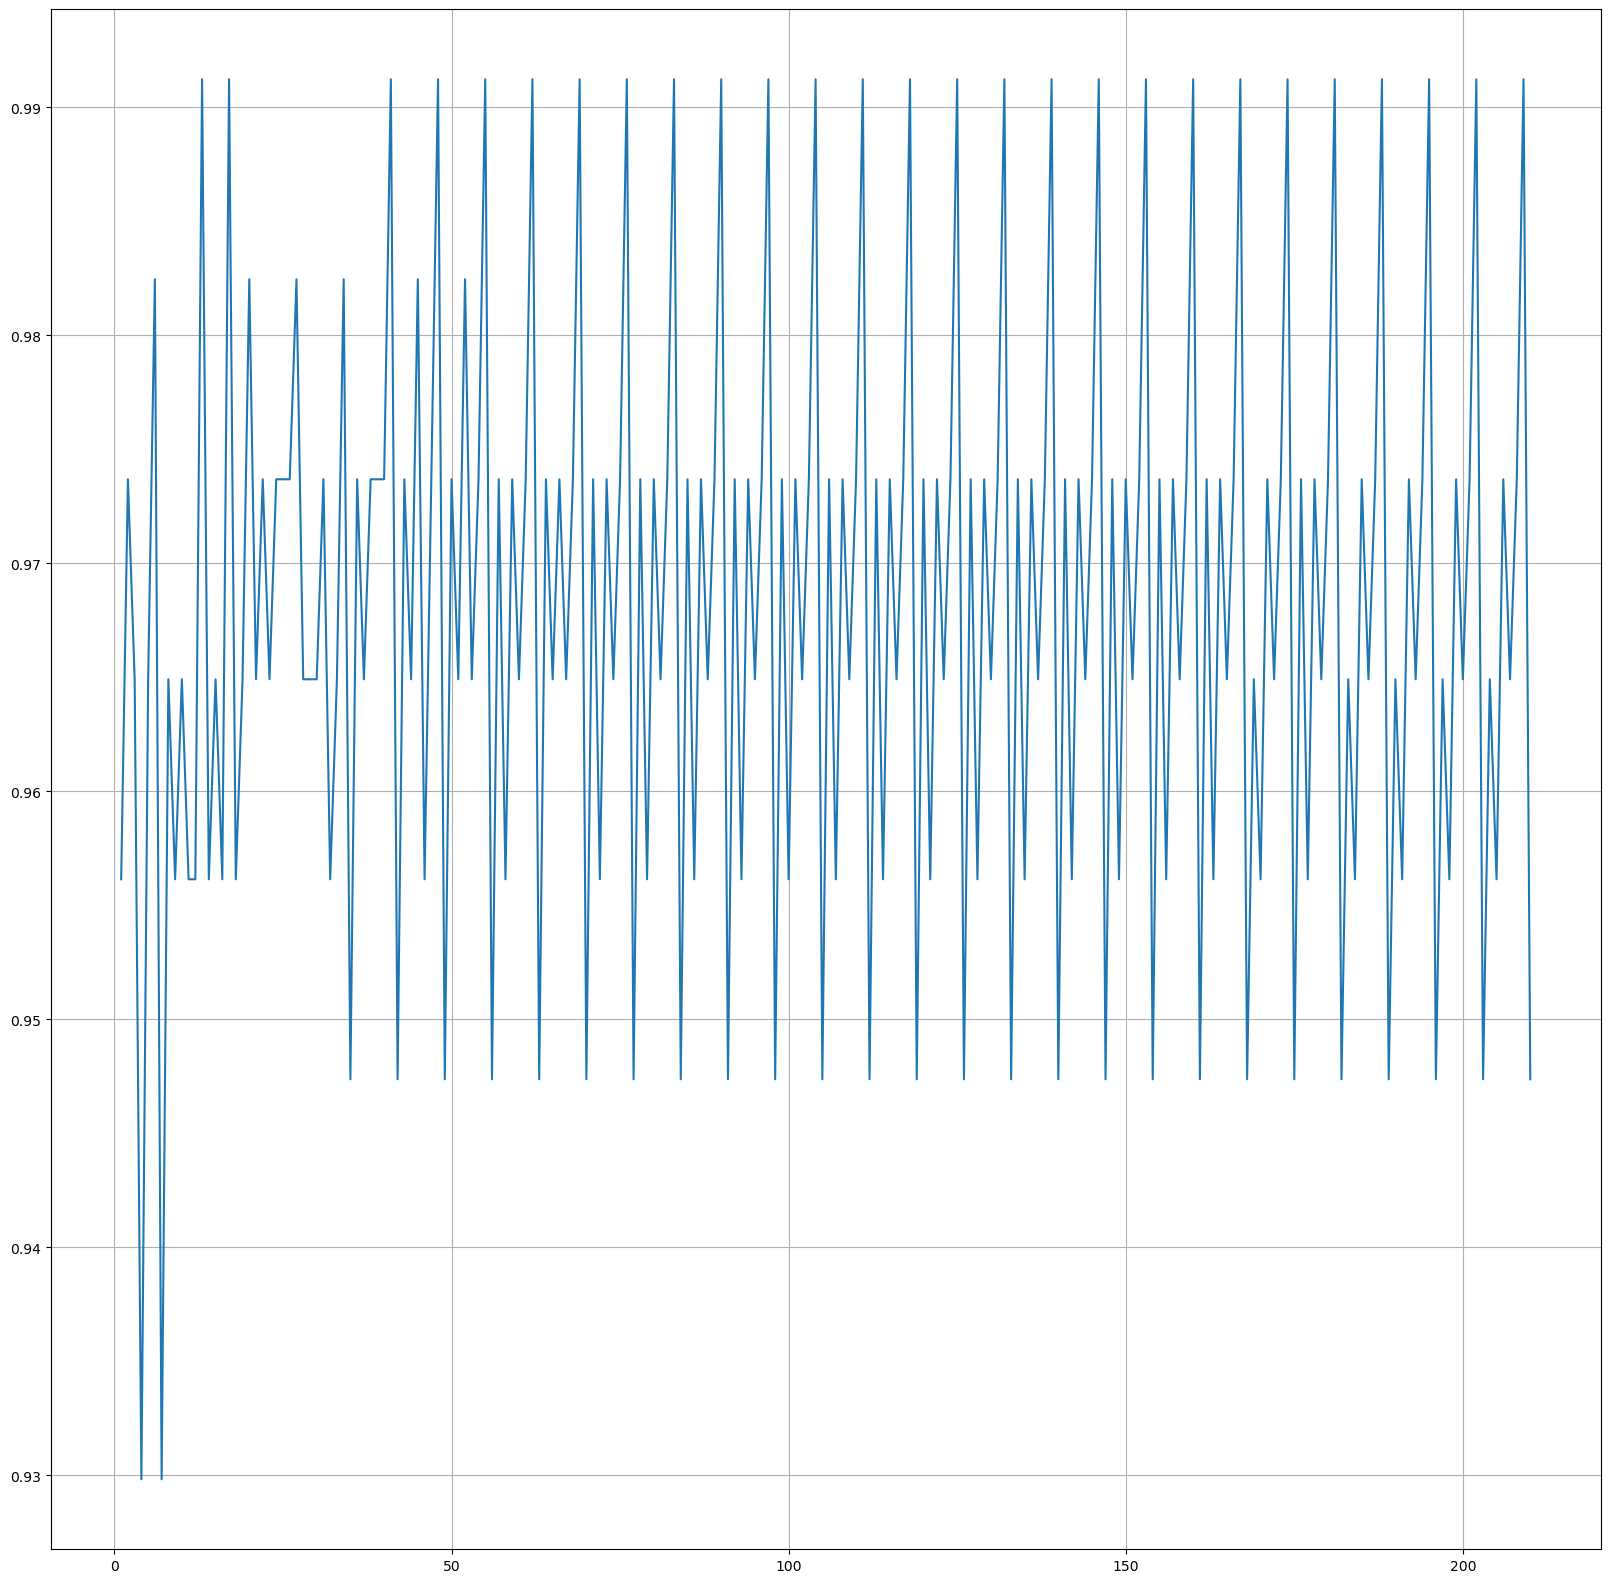

In [71]:
plt.figure(figsize=(20,20))
pd.Series(M, index =np.arange(1,211)).plot(grid=True)

<Axes: >

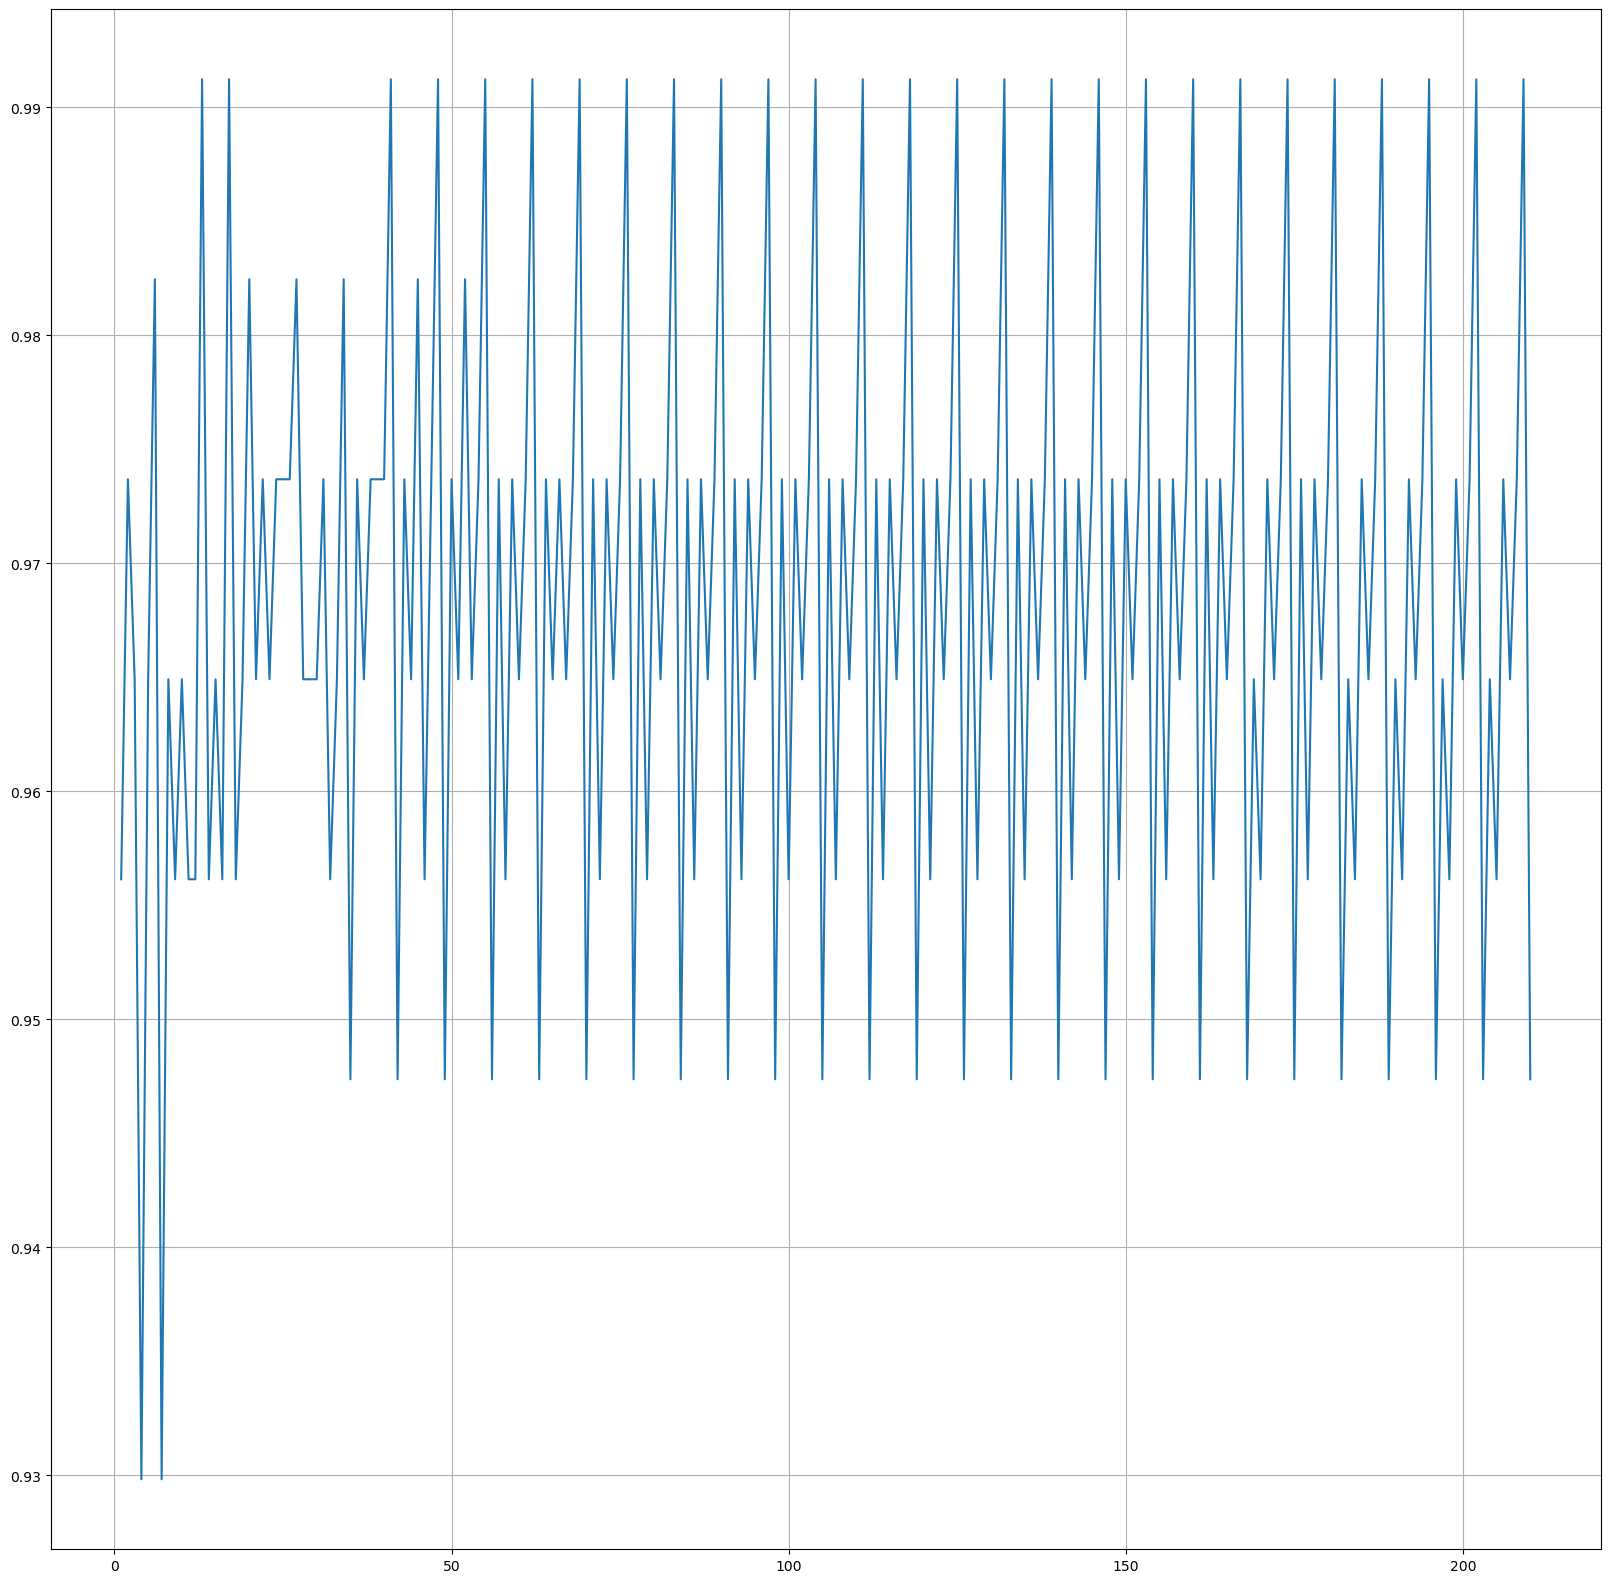

In [72]:
plt.figure(figsize=(20,20))
pd.Series(M, index = np.arange(1,211)).plot(grid=True)

In [85]:
M = np.empty(14) 
l = 0
for i in np.arange(40,80,20):
    for j in np.arange(0.1,0.8,0.1):
        grad = GradientBoostingClassifier(random_state=0, n_estimators=i, learning_rate=j)
        grad.fit(x_train, y_train)
        y_pred = grad.predict(x_test)

        M[l] = acc(y_test, y_pred)
        l = l+1

Text(0, 0.5, 'Array value')

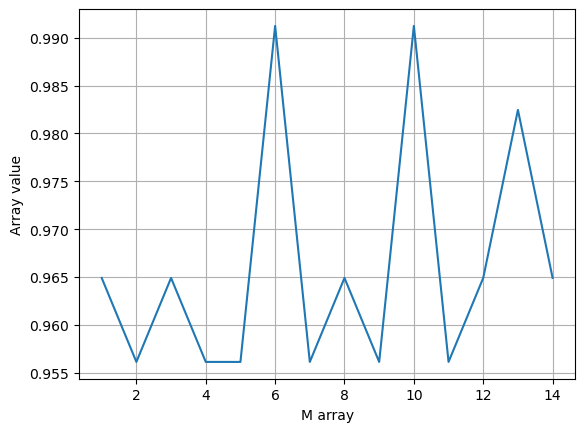

In [108]:
pd.Series(M, index=np.arange(1,15)).plot(grid=True)
plt.xlabel('M array')
plt.ylabel('Array value')


In [98]:
M

array([0.96491228, 0.95614035, 0.96491228, 0.95614035, 0.95614035,
       0.99122807, 0.95614035, 0.96491228, 0.95614035, 0.99122807,
       0.95614035, 0.96491228, 0.98245614, 0.96491228])

In [97]:
M[5], M[9]

(0.9912280701754386, 0.9912280701754386)

In [113]:
grad = GradientBoostingClassifier(random_state=0, n_estimators=40, learning_rate=0.6)
grad.fit(x_train, y_train)
y_pred = grad.predict(x_test)
acc(y_test, y_pred)

0.9912280701754386

In [107]:
grad = GradientBoostingClassifier(random_state=0, n_estimators=60, learning_rate=0.3)
grad.fit(x_train, y_train)
y_pred = grad.predict(x_test)
acc(y_test, y_pred)

0.9912280701754386

### Two peaks signify two different learning rates
- n_estimators = 40 and learning rate = 0.6
- n_estimators = 60 and learning rate = 0.3

In [109]:
con(y_test, y_pred)

array([[67,  0],
       [ 1, 46]])

# GradientBoosting Model is the best for modelling this dataset

In [111]:
from sklearn.model_selection import KFold, StratifiedGroupKFold, cross_val_score

In [114]:
cross_val = cross_val_score(grad,x,y,cv=KFold(10))
cross_val

array([0.96491228, 0.9122807 , 0.87719298, 0.94736842, 1.        ,
       0.98245614, 0.96491228, 0.98245614, 0.98245614, 0.96428571])

In [115]:
cross_val.mean()

0.9578320802005011